# Time-series Simulation of Distribution System with PV Control on Python-OpenDSS Interface

## 1. Basic Modules

In [1]:
import opendssdirect as dss
import os
import pathlib
import numpy as np
import pandas as pd
import random
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
from matplotlib.animation import FuncAnimation
from celluloid import Camera

In [2]:
dss.__version__
dss.run_command('Redirect C:/Users/smartgrid_AI/Documents/kms/Hyundai/NewIeee37.dss')
dss.run_command("New Energymeter.M1  Line.L1  1")
#dss.Solution.Solve()

''

In [3]:
allbusname = dss.Circuit.AllBusNames()
busmagpu = dss.Circuit.AllBusMagPu()
allbus = np.array(allbusname)
busmagpu3 = np.array(busmagpu).reshape(-1,3)
BusXY = 'C:/Users/smartgrid_AI/Documents/kms/Hyundai/IEEE37_BusXY.csv'
busposition = pd.read_csv(BusXY, encoding='CP949', header=None)
BusVol = np.concatenate([allbus.reshape(-1,1), busmagpu3], axis=1)
Volavg = np.average(busmagpu3[2:-1], axis=1)

## 2. PV Installation (Manual Installation)

In [4]:
dss.run_command("New Loadshape.MyIrrad npts=24 interval=1 mult=[0	0	0	0	0	0	0.060635269	0.334303652	0.712509398	1.188145406	1.519300343	1.633283854	1.720008482	1.7748861	1.635712863	1.448499219	1.085587235	0.635140953	0.224818306	0.027168919	0	0	0	0]")
dss.run_command("New Loadshape.MyLoad npts=24 interval=1 mult=[0.88649465	0.847586893	0.824626468	0.810807748	0.808050417	0.81543569	0.854856043	0.918443729	1.011297018	1.074020336	1.104456893	1.115341911	1.083370481	1.122746619	1.136014359	1.130316038	1.129009039	1.112199769	1.092962104	1.084670677	1.072273622	1.032156527	0.982890926	0.949972043]")
dss.run_command("New Loadshape.LightLoad npts=24 interval=1 mult=[0.780355145	0.746105792	0.725894406	0.713730193	0.711302996	0.717804034	0.752504611	0.808478979	0.890214996	0.945428486	0.972220892	0.981802653	0.953659144	0.988320799	1	0.994983936	0.993833423	0.979036717	0.962102367	0.954803668	0.943890906	0.908577008	0.865209949	0.836232426]")

''

In [5]:
pv_location=["702", "710", "709", "734", "741"]
PV_num = len(pv_location)

In [6]:
dss.run_command("New PVSystem.PV1 conn=Delta phases=3 bus=702 kV=4.8 irrad=1.0 Pmpp=400 kVA=400 kvarMax=300 kvarMaxAbs=300 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV2 conn=Delta phases=3 bus=710 kV=4.8 irrad=1.0 Pmpp=400 kVA=400 kvarMax=300 kvarMaxAbs=300 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV3 conn=Delta phases=3 bus=709 kV=4.8 irrad=1.0 Pmpp=500 kVA=500 kvarMax=400 kvarMaxAbs=400 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV4 conn=Delta phases=3 bus=734 kV=4.8 irrad=1.0 Pmpp=500 kVA=500 kvarMax=400 kvarMaxAbs=400 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV5 conn=Delta phases=3 bus=741 kV=4.8 irrad=1.0 Pmpp=700 kVA=700 kvarMax=500 kvarMaxAbs=500 Daily=MyIrrad WattPriority=False VarFollowInverter=False")

''

In [7]:
dss.run_command("New XYCurve.VVCurve npts=6 Xarray=(0.5, 0.95, 0.99, 1.01, 1.05, 1.5) Yarray=(1.0, 1.0, 0, 0, -1.0, -1.0)")
dss.run_command("New XYCurve.VWCurve npts=6 Xarray=(0.5, 0.95, 1, 1.01, 1.05, 1.5) Yarray=(1.0, 1.0, 1.0, 1.0, 0, 0)")
#dss.run_command("New InvControl.PVCtr CombiMode=VV_VW voltage_curvex_ref=rated vvc_curve1=VVCurve voltwatt_curve=VWCurve RefReactivePower=VARMAX")
dss.run_command("New InvControl.PVCtr1 mode=VOLTVAR voltage_curvex_ref=rated vvc_curve1=VVCurve RefReactivePower=VARMAX DeltaQ_factor=0.5")

''

In [8]:
pvdat = dss.utils.pvsystems_to_dataframe()
pvdat

,Irradiance,Name,pf,RegisterNames,RegisterValues,Idx,kVARated,kW,kvar,IrradianceNow,Pmpp,daily,duty,yearly,Tdaily,Tduty,Tyearly
pv1,1,pv1,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1,400,400,0,1,400,myirrad,,,,,
pv2,1,pv2,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2,400,400,0,1,400,myirrad,,,,,
pv3,1,pv3,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3,500,500,0,1,500,myirrad,,,,,
pv4,1,pv4,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",4,500,500,0,1,500,myirrad,,,,,
pv5,1,pv5,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,700,700,0,1,700,myirrad,,,,,


## 3. Simulation Settings

In [9]:
dss.run_command("New monitor.PV5m1 PVSystem.PV5 terminal=1 mode=1 ppolar=no")
dss.run_command("New monitor.PV5m0 PVSystem.PV5 terminal=1 mode=0 ppolar=no")
#dss.run_command("New monitor.Treg1A Transformer.reg1a mode=2")

''

In [10]:
dss.Settings.VoltageBases = [230,4.8,0.48]
dss.run_command("CalcVoltageBases")
dss.Solution.MaxIterations=10000
dss.Solution.MaxControlIterations=100000
dss.Solution.Solve()

In [11]:
dss.run_command("set mode=snap")

''

## 4. Voltage Sensitivity Analysis

In [12]:
import cmath
import csv

Ymat = dss.Circuit.SystemY()
Ymatrix = np.array(Ymat)
Ymatrix2 = Ymatrix.reshape(117,-1)

compY = np.zeros((117,117), dtype=np.complex_)
dss.run_command("Export Voltages")
dss.run_command("Export Y Matrix")
Voltdata = pd.read_csv('ieee37_EXP_VOLTAGES.csv')

Vmag = np.concatenate((np.array(Voltdata.iloc[:,3]).reshape(-1,1), np.array(Voltdata.iloc[:,7]).reshape(-1,1), np.array(Voltdata.iloc[:,11]).reshape(-1,1)), axis=1)
Vmag = Vmag.reshape(-1)
Vmag = Vmag*np.sqrt(3)

In [12]:
svp_mat = pd.read_csv('svp_matlab.csv', header=None)
svq_mat = pd.read_csv('svq_matlab.csv', header=None)
svp_mat.shape, svq_mat.shape, Ymatrix2.shape

((111, 111), (111, 111), (117, 234))

In [13]:
buspos = busposition.iloc[:,0]
buspos = buspos.values
newpos = np.zeros([len(busposition),2])
for i in range(len(BusVol)):
    ind = np.where(buspos == BusVol[i,0])
    newpos[i,:] = busposition.iloc[ind[0][0],1:]  
    
BusDat = np.concatenate([BusVol, newpos], axis=1)

dss.Lines.First()
name, B1, B2 = list(), list(), list()

while True:
    a = dss.Lines.Name()
    b = dss.Lines.Bus1()
    c = dss.Lines.Bus2()
    b = b.replace('.1.2.3','')
    c = c.replace('.1.2.3','')
    name.append(a),
    B1.append(b),
    B2.append(c)
    if not dss.Lines.Next() > 0:
        break
        
busnamepos = np.concatenate([BusVol[:,0].reshape(-1,1), newpos], axis=1)

In [14]:
ind_pv = np.zeros(len(pv_location), dtype=int)

for i in range(len(pv_location)):
    ind_pv[i] = int(np.where(busnamepos[:,0]==pv_location[i])[0][0])

ind_pv

array([ 5, 25,  2, 33, 29])

In [15]:
pvset_p = np.array([400, 400, 500, 500, 600], dtype=np.float32)
pvset_q = np.array([0, 0, 0, 0, 10], dtype=np.float32)
pvset_p = pvset_p
pvset_q = pvset_q
pvset_p, pvset_q

(array([400., 400., 500., 500., 600.], dtype=float32),
 array([ 0.,  0.,  0.,  0., 10.], dtype=float32))

In [16]:
for i in range(len(pv_location)):
    dss.run_command("PVSystem.PV"+str(i+1)+".Pmpp="+str(pvset_p[i]))
    dss.run_command("PVSystem.PV"+str(i+1)+".kvar="+str(pvset_q[i]))

dss.utils.pvsystems_to_dataframe()

,Irradiance,Name,pf,RegisterNames,RegisterValues,Idx,kVARated,kW,kvar,IrradianceNow,Pmpp,daily,duty,yearly,Tdaily,Tduty,Tyearly
pv1,1,pv1,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1,400,400,0,1,400,myirrad,,,,,
pv2,1,pv2,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2,400,400,0,1,400,myirrad,,,,,
pv3,1,pv3,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",3,500,500,0,1,500,myirrad,,,,,
pv4,1,pv4,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",4,500,500,0,1,500,myirrad,,,,,
pv5,1,pv5,1,"[kWh, kvarh, Max kW, Max kVA, Hours, Price($)]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,700,600,10,1,600,myirrad,,,,,


In [17]:
dss.Solution.Solve()
dss.run_command("Export Voltages")
#dss.run_command("Export Monitors Treg1A")
Voltdata2 = pd.read_csv('ieee37_EXP_VOLTAGES.csv')

In [18]:
Vmag2 = np.concatenate((np.array(Voltdata2.iloc[:,3]).reshape(-1,1), np.array(Voltdata2.iloc[:,7]).reshape(-1,1), np.array(Voltdata2.iloc[:,11]).reshape(-1,1)), axis=1)
Vmag2 = Vmag2.reshape(-1)
Vmag2 = Vmag2*np.sqrt(3)
Vmag2

array([229997.29468626, 229999.02673707, 229999.02673707,   4519.52677473,
         4628.73257815,   4624.38513062,   4932.63821284,   5095.00065554,
         5071.82581574,    493.25689308,    509.45503223,    507.2345431 ,
         4924.68809964,   5067.65157329,   5049.34379626,   4917.03243507,
         5064.96689454,   5041.91329829,   4913.13532075,   5060.41160092,
         5034.44815931,   4910.06959082,   5057.24194794,   5032.43898038,
         4916.04516611,   5069.36630359,   5049.25719372,   4910.53724454,
         5065.34794572,   5046.05289972,   4927.58062449,   5088.57474705,
         5065.39990724,   4902.91622099,   5046.12218176,   5021.31921419,
         4901.94627253,   5045.10027178,   5021.18065013,   4896.75012011,
         5035.08901811,   5004.95133406,   4912.71962856,   5056.79161473,
         5031.57295497,   4911.0915008 ,   5060.41160092,   5032.14453174,
         4896.68083808,   5033.61677492,   5003.40980884,   4896.64619706,
         5032.2830958 ,  

In [19]:
Vdev = Vmag2-Vmag
Vdev.shape, Vdev

((117,),
 array([  0.        ,   0.        ,   0.        ,  -1.64544827,
         -1.2817176 ,  -1.35099963,  -8.38312591,  -6.80695967,
         -6.99748526,  -0.83831259,  -0.67723187,  -0.70321263,
         -3.48142212,  -2.65003774,  -2.9964479 ,  -4.55529362,
         -3.46410162,  -3.84515279,  -4.57261413,  -3.48142212,
         -3.84515279,  -4.57261413,  -3.48142212,  -3.84515279,
         -6.06217783,  -4.64189616,  -5.02294734,  -6.06217783,
         -4.64189616,  -5.02294734,  -7.81154914,  -6.25270342,
         -6.49519053,  -4.55529362,  -3.44678111,  -3.84515279,
         -4.57261413,  -3.46410162,  -3.84515279,  -4.57261413,
         -3.44678111,  -3.84515279,  -4.57261413,  -3.46410162,
         -3.84515279,  -4.57261413,  -3.48142212,  -3.84515279,
         -4.57261413,  -3.46410162,  -3.8624733 ,  -4.57261413,
         -3.44678111,  -3.84515279,  -4.57261413,  -3.44678111,
         -3.8624733 ,  -4.57261413,  -3.44678111,  -3.84515279,
         -4.57261413,  -3.44678

In [21]:
pvdat.iloc[:,7:9]

devp = pvset_p - pvdat.iloc[:,7]
devq = pvset_q - pvdat.iloc[:,8]
devp, devq

(pv1      0
 pv2      0
 pv3      0
 pv4      0
 pv5   -100
 Name: kW, dtype: object,
 pv1     0
 pv2     0
 pv3     0
 pv4     0
 pv5    10
 Name: kvar, dtype: object)

In [22]:
devp3 = np.zeros((len(Ymatrix2))-6)
devq3 = np.zeros((len(Ymatrix2))-6)

for i in range(len(pv_location)):
    devp3[ind_pv[i]*3-6:ind_pv[i]*6] = devp[i]/3*1000
    devq3[ind_pv[i]*3-6:ind_pv[i]*6] = devq[i]/3*1000

In [23]:
vdev_p = np.dot(svp_mat,devp3)
vdev_q = np.dot(svq_mat,devq3)

In [24]:
vdev_p

array([-19.55565392, -17.71614997, -14.66731314,  -2.75837939,
        -1.94585792,  -0.09147706,   0.82476112,   1.44463356,
         1.43255118,  -4.3626509 ,  -3.17927114,  -2.86130595,
        -4.35953782,  -3.17659965,  -2.85719741,  -4.76958686,
        -3.52857933,  -3.20210718, -10.92081504,  -9.13056116,
        -8.31894807, -12.44752339, -10.5149615 ,  -9.69364428,
       -16.20256405, -14.59881009, -12.41417739,  -5.36015611,
        -4.0332347 ,  -3.69617046,  -5.53036851,  -4.18797874,
        -3.85058509,  -5.35467935,  -4.02476307,  -3.68469011,
        -4.35937566,  -3.17463844,  -2.85595603,  -4.35781603,
        -3.17647105,  -2.85565006,  -5.35474371,  -4.02360533,
        -3.68348489,  -5.35463033,  -4.02357408,  -3.68210989,
        -5.35193513,  -4.01166814,  -3.67186207,  -5.35210506,
        -4.00894472,  -3.66992687,  -5.35175216,  -4.0101694 ,
        -3.67054144, -19.48266612, -17.68241977, -15.11203423,
       -21.33850921, -19.25841831, -16.66763893, -19.47

In [33]:
vdev_p+vdev_q, vdev_p2+vdev_q2

(array([-2.31333427e+17,  4.62470226e+17, -2.73113529e+17, -8.48323683e+01,
        -2.24327419e+02,  2.20010912e+02, -2.70955398e+01,  1.59820789e+01,
         8.61713941e+00, -7.01867919e-02, -5.29691902e-02, -4.48661033e-02,
        -2.69735937e+01,  1.63123034e+01,  8.27224559e+00, -2.69988280e+01,
         1.62220989e+01,  8.36076645e+00, -2.69849326e+01,  1.62412606e+01,
         8.35364840e+00, -2.70055901e+01,  1.62380010e+01,  8.35609725e+00,
        -2.70263003e+01,  1.61206317e+01,  8.48149353e+00, -2.70183165e+01,
         1.61103938e+01,  8.48120322e+00, -2.70896755e+01,  1.60159417e+01,
         8.58389026e+00, -2.69971909e+01,  1.62712790e+01,  8.34956334e+00,
        -2.69955442e+01,  1.62676703e+01,  8.35124003e+00, -2.69974332e+01,
         1.63020549e+01,  8.36040442e+00, -2.69922201e+01,  1.62446692e+01,
         8.36554042e+00, -2.70024131e+01,  1.62367078e+01,  8.35231149e+00,
        -2.70037363e+01,  1.63056313e+01,  8.36611497e+00, -2.70073186e+01,
         1.6

## 4-2. TS Simulation With Control

In [11]:
dss.run_command("New XYCurve.VVCurve npts=6 Xarray=(0.5, 0.95, 0.99, 1.01, 1.05, 1.5) Yarray=(1.0, 1.0, 0, 0, -1.0, -1.0)")
dss.run_command("New XYCurve.VWCurve npts=4 Xarray=(0.5,0.95,1.05,1.5) Yarray=(1,1,0,0)")
#dss.run_command("New InvControl.PVCtr CombiMode=VV_VW voltage_curvex_ref=rated vvc_curve1=VVCurve voltwatt_curve=VWCurve RefReactivePower=VARMAX_VARS")
dss.run_command("New InvControl.PVCtr1 mode=VOLTVAR voltage_curvex_ref=rated vvc_curve1=VVCurve RefReactivePower=VARMAX DeltaQ_factor=0.5")

''

In [12]:
dss.Settings.VoltageBases = [230,4.8,0.48]
dss.run_command("CalcVoltageBases")
dss.Solution.MaxIterations=10000
dss.Solution.MaxControlIterations=100000
dss.Solution.Solve()

In [13]:
V_list, P_list, PV_list = [], [], []
for i in range(24):   
    simulationTime = dss.Solution.DblHour 
    h = dss.Solution.Hour 
    dss.Solution.InitSnap()
    #dss.Solution.SolvePlusControl()
    while dss.Solution.ControlActionsDone()==0:
        dss.Solution.SolveNoControl()
        dss.Solution.SampleControlDevices()
        dss.Solution.DoControlActions()
    dss.run_command("Export monitors PV5m1")
    dss.run_command("Export monitors PV5m0")
    dss.run_command("Export Powers")
    dss.run_command("Export Voltages")
    dss.Solution.FinishTimeStep()
    #dss.Solution.Hour = dss.Solution.Hour+i
    
    volts = dss.Circuit.AllBusMagPu()
    powers = pd.read_csv('ieee37_EXP_POWERS.csv')
    PVS = dss.utils.pvsystems_to_dataframe()
    
    V_list.append(volts)
    P_list.append(powers.iloc[-5:,2:4])
    PV_list.append(PVS.iloc[:,7:10])
dss.Monitors.SaveAll()    
V_list = np.array(V_list)
#PV_list, P_list

In [14]:
buspos = busposition.iloc[:,0]
buspos = buspos.values
newpos = np.zeros([len(busposition),2])
for i in range(len(BusVol)):
    ind = np.where(buspos == BusVol[i,0])
    newpos[i,:] = busposition.iloc[ind[0][0],1:]  
    
BusDat = np.concatenate([BusVol, newpos], axis=1)

dss.Lines.First()
name, B1, B2 = list(), list(), list()

while True:
    a = dss.Lines.Name()
    b = dss.Lines.Bus1()
    c = dss.Lines.Bus2()
    b = b.replace('.1.2.3','')
    c = c.replace('.1.2.3','')
    name.append(a),
    B1.append(b),
    B2.append(c)
    if not dss.Lines.Next() > 0:
        break
        
busnamepos = np.concatenate([BusVol[:,0].reshape(-1,1), newpos], axis=1)

In [15]:
V3_list = V_list.reshape(24,-1)
V3p_list = V3_list.reshape(24,-1,3)
V3p_list = V3p_list[:,:,:]
posvalue = busnamepos[:,1:].astype(np.float)

ind = np.zeros(len(posvalue))
dist = np.zeros(len(posvalue))
#dist_d = np.zeros(len(posvalue))
newvol = np.zeros(V3p_list.shape)
for i in range(len(posvalue)):
    ind[i] = np.where(BusVol[:,0]==busposition.iloc[i, 0])[0][0]
    ind = ind.astype(np.int)
    newvol[:,i,:] = V3p_list[:,ind[i],:]
    if i<4:
        dist[i] = busposition.iloc[4, 2] - busposition.iloc[i, 2] 
    else:
        dist[i] = abs(busposition.iloc[i, 1]) + abs(busposition.iloc[4, 2]-busposition.iloc[i, 2])
dist[31] = dist[12]+1.3
dist[19] = dist[9] +0.92
dist[33] = dist[32]+0.4
dist[13] = dist[33]+0.4
dist[34] = dist[13]+0.2
dist[35] = dist[13]+0.4

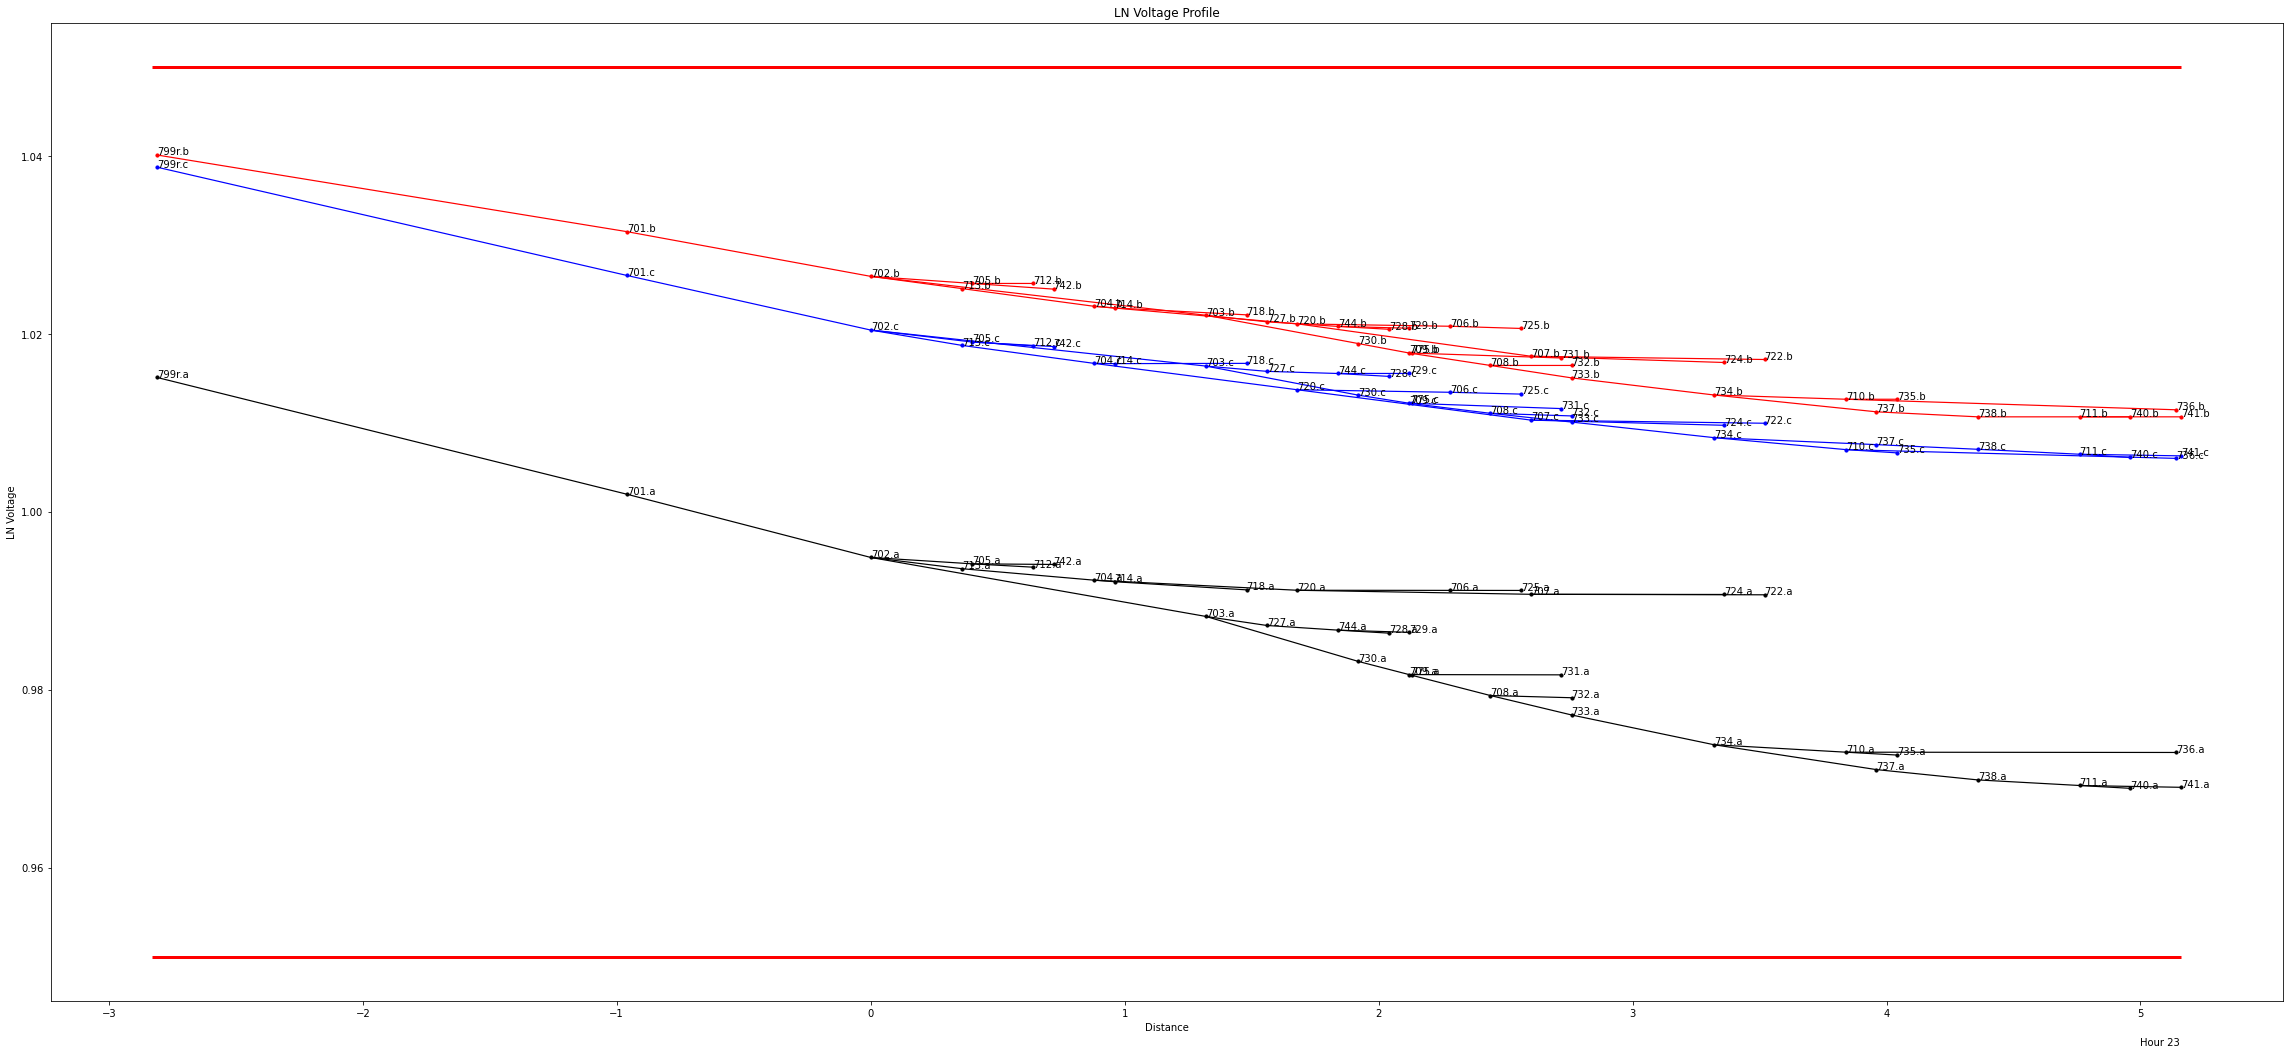

In [16]:
from IPython.display import HTML

fig = plt.figure(figsize=(40, 18))
camera = Camera(fig)
plt.xlabel('Distance')
plt.ylabel('LN Voltage')
for t in range(24):
    plt.title("LN Voltage Profile")
    x = dist[2:]
    y1 = newvol[t, 2:, 0]
    y2 = newvol[t, 2:, 1]
    y3 = newvol[t, 2:, 2]
    plt.scatter(x, y1, c='black', s=10)
    plt.scatter(x, y2, c='red', s=10)
    plt.scatter(x, y3, c='blue', s=10)
    plt.hlines(0.95, dist[0], max(dist), colors='red', linewidth=3)
    plt.hlines(1.05, dist[0], max(dist), colors='red', linewidth=3)
    plt.text(5, 0.94, "Hour "+str(t+1))
    for i in range(2, len(newpos)): 
        name = busposition.iloc[i,0]
        x = dist[i] 
        ya = newvol[t,i,0]
        yb = newvol[t,i,1]
        yc = newvol[t,i,2]
        plt.text(x, ya, name+".a")
        plt.text(x, yb, name+".b")
        plt.text(x, yc, name+".c")

    for i in range(len(B1)):
        ind1 = np.where(busposition.iloc[:,0]==B1[i])[0][0]
        ind2 = np.where(busposition.iloc[:,0]==B2[i])[0][0]
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,0], newvol[t,ind2,0]], c='black', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,1], newvol[t,ind2,1]], c='red', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,2], newvol[t,ind2,2]], c='blue', linewidth=1.2)
    camera.snap()
anim = camera.animate(interval=1000, blit=True)
HTML(anim.to_html5_video())

In [17]:
anim.save('LN Voltage Profile with PV control.mp4')

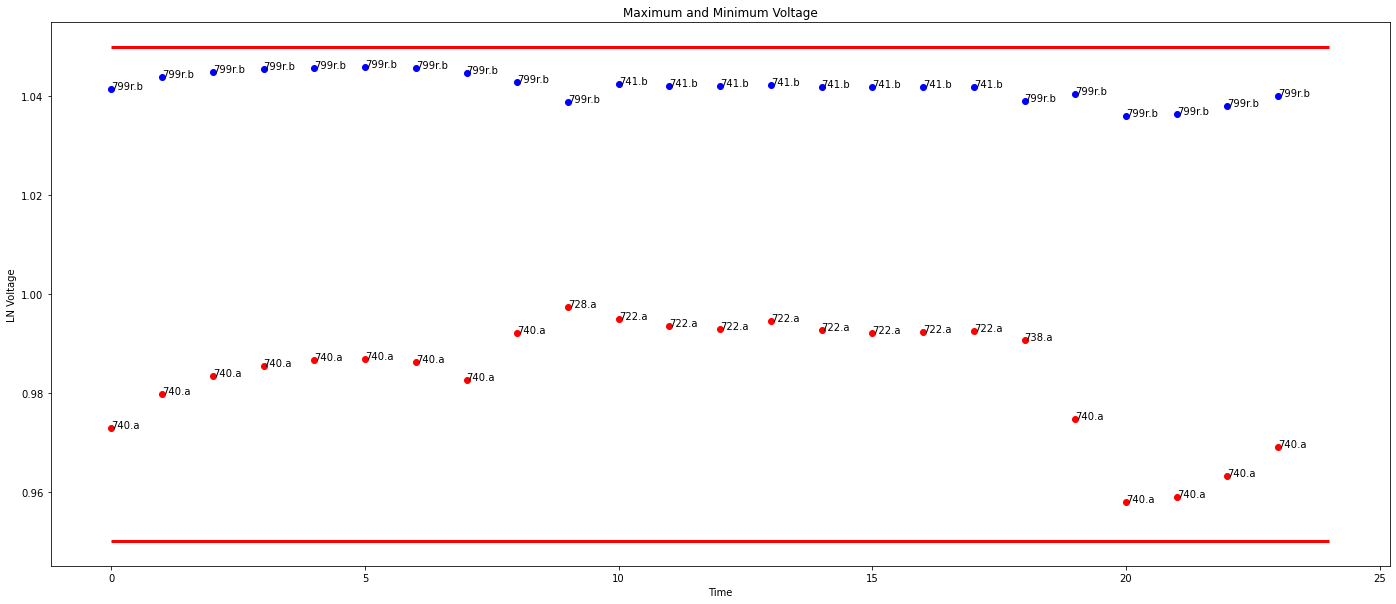

In [18]:
fig = plt.figure(figsize=(24, 10))
plt.xlabel('Time')
plt.ylabel('LN Voltage')
plt.title('Maximum and Minimum Voltage')
for t in range(24):
    plt.scatter(t, np.max(newvol[t,2:,:]), c='blue')    
    plt.scatter(t, np.min(newvol[t,2:,:]), c='red')
    maxind = np.argmax(newvol[t,2:,:])
    minind = np.argmin(newvol[t,2:,:])
    #print(maxind, minind)
    if (maxind)%3 == 0:
        phsmax = 'a'
    elif (maxind)%3 == 1:
        phsmax = 'b'
    else:
        phsmax = 'c'
        
    if (minind)%3 == 0:
        phsmin = 'a'
    elif (minind)%3 == 1:
        phsmin = 'b'
    else:
        phsmin = 'c'
        
    plt.text(t, np.max(newvol[t,2:,:]), busposition.iloc[(maxind)//3+2,0] + "."+ phsmax)
    plt.text(t, np.min(newvol[t,2:,:]), busposition.iloc[(minind)//3+2,0] + "."+ phsmin)
    #print(maxind, minind, maxind//38, minind//38)
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)

## 4-3. Checking Simulation Results

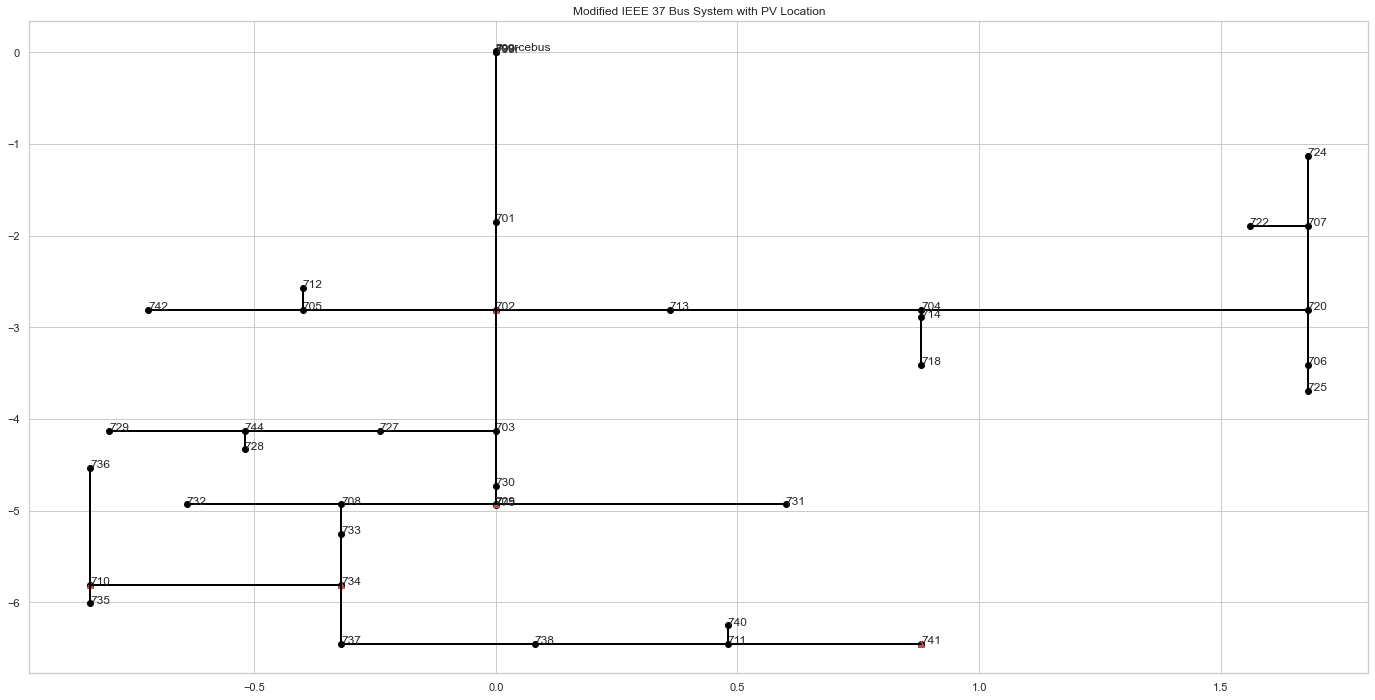

In [19]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(24, 12))
plt.title("Modified IEEE 37 Bus System with PV Location")
plt.scatter(busposition.iloc[:,1], busposition.iloc[:,2], c='black', alpha=1)
for i in range(len(newpos)): 
    name = busposition.iloc[i,0] 
    x = busposition.iloc[i,1]
    y = busposition.iloc[i,2]
    plt.text(x, y, name) 
    
for i in range(len(B1)):
    ind1 = np.where(busnamepos[:,0]==B1[i])[0][0]
    ind2 = np.where(busnamepos[:,0]==B2[i])[0][0]
    a = np.array(busnamepos[ind1,1:].astype(np.float))
    b = np.array(busnamepos[ind2,1:].astype(np.float))
    plt.plot([a[0], b[0]], [a[1], b[1]], c='black', linewidth=2)

for i in range(len(pv_location)):
    ind1 = np.where(busnamepos[:,0]==pv_location[i])[0][0]
    ind2 = np.where(busnamepos[:,0]==pv_location[i])[0][0]
    a = np.array(busnamepos[ind1,1:].astype(np.float))
    b = np.array(busnamepos[ind2,1:].astype(np.float))
    plt.scatter([a[0], b[0]], [a[1], b[1]], marker='^', c='r', alpha=1)
 
plt.show()


In [36]:
ind_pv = np.zeros(len(pv_location), dtype=int)
for i in range(len(pv_location)):
    ind_pv[i] = int(np.where(busnamepos[:,0]==pv_location[i])[0][0])

Vavg = np.mean(V_list.reshape(24,-1,3), axis=2)
PV_Volts = Vavg[:,ind_pv]
PV_PQ = np.array(PV_list)
PV_outputs = np.concatenate([PV_Volts.reshape(24,-1,1), PV_PQ[:,:,:2]], axis=2)
PV_outputs.shape

(24, 5, 3)

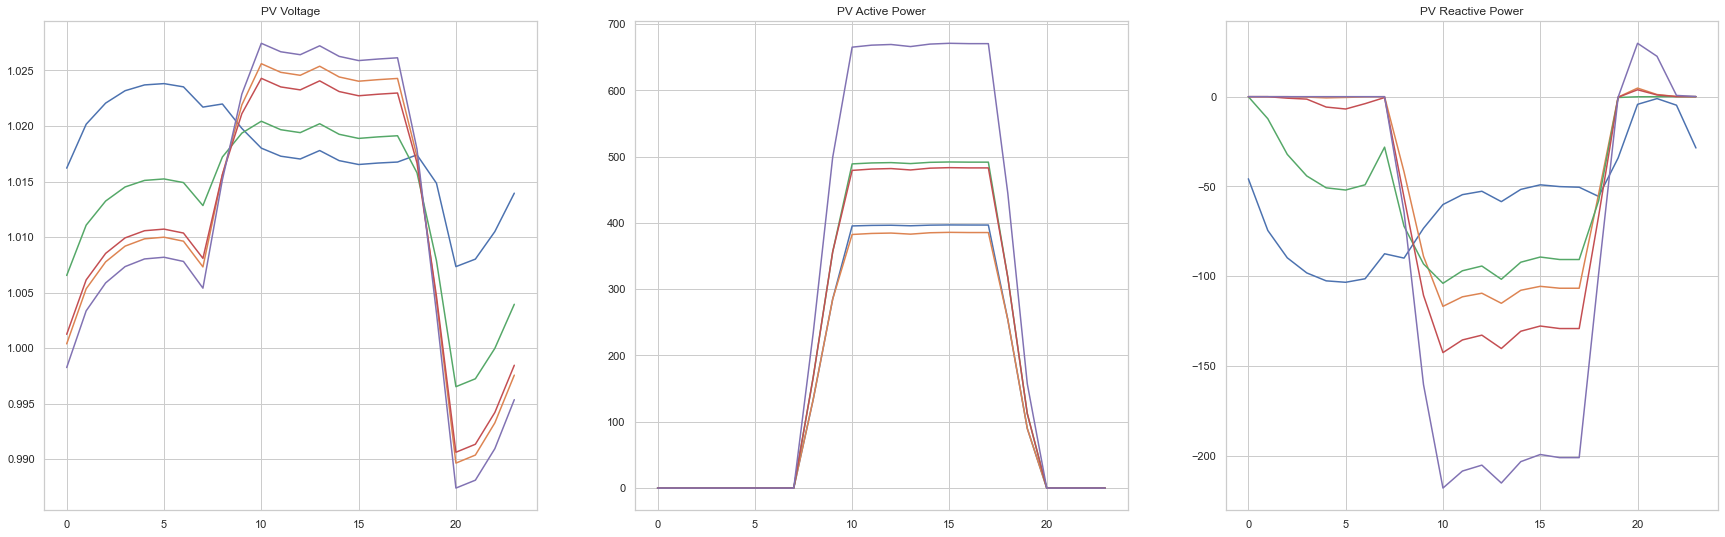

In [37]:
#plt.title("Voltage and Power Output of PVs")
#for t in range(2):
plt.figure(figsize=(30,9))
plt.subplot(131)
for i in range(5):
    plt.plot(PV_outputs[:,i,0])
plt.title("PV Voltage")

plt.subplot(132)
for i in range(5):
    plt.plot(PV_outputs[:,i,1])
plt.title("PV Active Power")

plt.subplot(133)
for i in range(5):
    plt.plot(PV_outputs[:,i,2])
plt.title("PV Reactive Power")
plt.show()


In [23]:
import cmath
import csv

Ymat = dss.Circuit.SystemY()
Ymatrix = np.array(Ymat)
Ymatrix2 = Ymatrix.reshape(117,-1)

compY = np.zeros((117,117), dtype=np.complex_)
dss.run_command("Export Voltages")
Voltdata = pd.read_csv('ieee37_EXP_VOLTAGES.csv')

for i in range(117):
    for j in range(117):
        compY[i,j] = complex(Ymatrix2[i,2*j], Ymatrix2[i, 2*j+1])
Gm = Ymatrix2[:, 0::2]
Bm = Ymatrix2[:, 1::2]
Vmag = np.concatenate((np.array(Voltdata.iloc[:,3]).reshape(-1,1), np.array(Voltdata.iloc[:,7]).reshape(-1,1), np.array(Voltdata.iloc[:,11]).reshape(-1,1)), axis=1)
Vang = np.concatenate((np.array(Voltdata.iloc[:,4]).reshape(-1,1), np.array(Voltdata.iloc[:,8]).reshape(-1,1), np.array(Voltdata.iloc[:,12]).reshape(-1,1)), axis=1)
Vang = Vang*np.pi/180
Vmag = Vmag.reshape(-1)
Vang = Vang.reshape(-1)

In [24]:
J1, J2, J3, J4 = np.zeros((117, 117)), np.zeros((117, 117)), np.zeros((117, 117)), np.zeros((117, 117))

for i in range(117):
    for j in range(117):
        if i != j:
            J1[i,j] = Vmag[i]*Vmag[j]*(Gm[i,j]*np.sin(Vang[i]-Vang[j])) - Bm[i,j]*np.cos(Vang[i]-Vang[j])
            J2[i,j] = Vmag[i]*(Gm[i,j]*np.cos(Vang[i]-Vang[j])) + Bm[i,j]*np.sin(Vang[i]-Vang[j])
            J3[i,j] = -Vmag[i]*Vmag[j]*(Gm[i,j]*np.cos(Vang[i]-Vang[j])) + Bm[i,j]*np.sin(Vang[i]-Vang[j])
            J4[i,j] = Vmag[i]*(Gm[i,j]*np.sin(Vang[i]-Vang[j])) - Bm[i,j]*np.cos(Vang[i]-Vang[j])
        else:
            for k in range(117):
                if k != i:
                    J1[i,j] = J1[i,j] - Vmag[i]*Vmag[k]*(Gm[i,k]*np.sin(Vang[i]-Vang[k])) - Bm[i,k]*np.cos(Vang[i]-Vang[k])
                    J2[i,j] = J2[i,j] + Vmag[k]*(Gm[i,j]*np.cos(Vang[i]-Vang[j])) + Bm[i,k]*np.sin(Vang[i]-Vang[k])
                    J3[i,j] = J3[i,j] + Vmag[i]*Vmag[k]*(Gm[i,k]*np.cos(Vang[i]-Vang[k])) - Bm[i,k]*np.sin(Vang[i]-Vang[k])
                    J4[i,j] = J4[i,j] + Vmag[k]*(Gm[i,k]*np.sin(Vang[i]-Vang[k])) - Bm[i,k]*np.cos(Vang[i]-Vang[k])
                else:
                    J2[i,j] = J2[i,j] + 2*Vmag[i]*Gm[i,j]
                    J4[i,j] = J4[i,j] - 2*Vmag[i]*Bm[i,j]
                    
                    
Jac12 = np.concatenate((J1, J2), axis=1)
Jac34 = np.concatenate((J3, J4), axis=1)
Jac = np.concatenate((Jac12, Jac34), axis=0)
invJ = np.linalg.inv(Jac)

In [25]:
intvsens = np.zeros((len(intbusind), len(invJ)))
for i in range(len(intbusind)):
    intvsens[i,:] = invJ[int(invJ.shape[0]/2)+intbusind[i],:]
intvsens.shape

NameError: name 'intbusind' is not defined

In [ ]:
intvsens = np.zeros((len(intbusind), len(invJ)))
for i in range(len(intbusind)):
    intvsens[i,:] = invJ[int(invJ.shape[0]/2)+intbusind[i],:]
intvsens.shape
intvsens = intvsens.reshape(-1,3,39*2)
intvsensavg = np.mean(intvsens, axis=1)
Psens = intvsensavg[:,:39]
Qsens = intvsensavg[:,39:]
PVstand = -Psens[0,:]+Psens[1,:]+Psens[2,:]